# Local Search Implementation on Diagonal Magic Cube
## by:
- Jeremy Deandito / 18222112 

- Nathaniel Liady / 18222114

- Gabriel Marcellino / 18222115

- Nicolas Jeremy / 18222135

## Import relevant libraries

In [7]:
from tensor import *

from simulated import *
from hill_climb import *
from random_restart import *
from genetic import *


import numpy as np

## Cube Initialization

### Goal State
 Final state cube we are trying to achieve.<br><br> 
 The ideal state

In [8]:
goal_state = [

# Level 1
[
    [67,18,119,106,5],
    [116,17,14,73,95],
    [40,50,81,65,79],
    [56,120,55,49,35],
    [36,110,46,22,101]
],
# Level 2
[
    [66,72,27,102,48],
    [26,39,92,44,114],
    [32,93,88,83,19],
    [113,57,9,62,74],
    [78,54,99,24,60]
],
# Level 3
[
    [42,111,85,2,75],
    [30,118,21,123,23],
    [89,68,63,58,37],
    [103,3,105,8,96],
    [51,15,41,124,84]
],
# Level 4
[
    [115,98,4,1,97],
    [52,64,117,69,13],
    [107,43,38,33,94],
    [12,82,34,87,100],
    [29,28,122,125,11]
],
# Level 5
[
    [25,16,80,104,90],
    [91,77,71,6,70],
    [47,61,45,76,86],
    [31,53,112,109,10],
    [121,108,7,20,59]
]
]

In [9]:
goal_cube = Tensor(5,5,5,initial_array=goal_state)

In [10]:
obj_func_goal = goal_cube.objective_function()
print(f"goal cube objective function value: {obj_func_goal}")

goal cube objective function value: 0.0


### Problem Cube Initialization

In [11]:
problem_cube = Tensor(5,5,5)

cube = problem_cube.initial_state()

## Local Seach Implementation

### Random Restart Hill-Climbing


In [12]:
print(f"ideal objective function {obj_func_goal}")

ideal objective function 0.0


In [13]:
RR = Random_restart(cube=cube,max_restart=100)

Initial Value: 622085.0

Restart: 1

Initial Value: 622085.0

Step 1: Choosen Neighbor Value: 464318.0; Best Value: 622085.0
Step 2: Choosen Neighbor Value: 430988.0; Best Value: 464318.0
Iteration Value: 430988.0

Best Value: 430988.0

Restart: 2

Initial Value: 622085.0

Step 1: Choosen Neighbor Value: 471511.0; Best Value: 622085.0
Step 2: Choosen Neighbor Value: 446802.0; Best Value: 471511.0
Iteration Value: 446802.0

Best Value: 430988.0

Restart: 3

Initial Value: 622085.0

Step 1: Choosen Neighbor Value: 412163.0; Best Value: 622085.0
Iteration Value: 412163.0

Best Value: 412163.0

Restart: 4

Initial Value: 622085.0

Step 1: Choosen Neighbor Value: 514374.0; Best Value: 622085.0
Step 2: Choosen Neighbor Value: 498820.0; Best Value: 514374.0
Step 3: Choosen Neighbor Value: 490763.0; Best Value: 498820.0
Iteration Value: 490763.0

Best Value: 412163.0

Restart: 5

Initial Value: 622085.0

Step 1: Choosen Neighbor Value: 471418.0; Best Value: 622085.0
Step 2: Choosen Neighbor Va

In [14]:
RR.results()

+------------------------ RESULTS -------------------------+

    Best iteration: 66

  final Value: 376726.000000

+-------------------------- END ---------------------------+


In [15]:
# print(f"Random Restart Best Value: {RR.best_value}\n")
# print(f"Ideal Value: {obj_func_goal}\n")
# print(f"differences from ideal: {RR.best_value - obj_func_goal}")

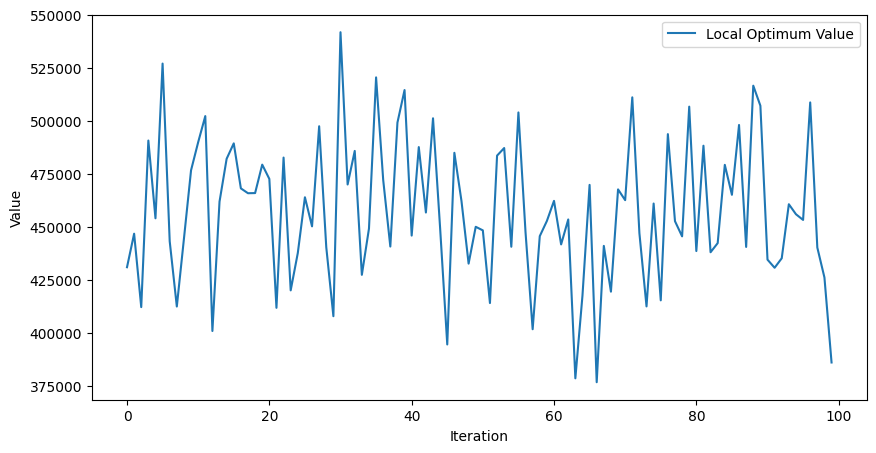

In [16]:
RR.hist_plot()

### Simulated Annealing

#### Initial State

In [17]:
SA_cube = copy.deepcopy(cube)

#### Searching

In [18]:
SA = Simulated(cube=SA_cube,tmax=1000,step_max=100,cooling_schedule="quadratic",alpha=0.99,greedy_move=False,function_error='absolute')

Initial Energy: 6221.0

rand_val: 0.09054608494945249

rand_val: 0.7326171635221211



#### Plot

Best Energy 

In [20]:
# SA.hist_plot(Best_energy=True,Curr_energy=True,freq_stuck=False,title="Quadratic Multiplicative Best Energy Plot")

Probability

In [ ]:
SA.prob_plot(title="Quadratic Multiplicative Probability Plot")

#### Results

In [ ]:
SA.results()

### Genetic Algorithm(NJ)


In [ ]:
GAcube = copy.deepcopy(cube)

In [ ]:
genetic_algo = GeneticAlgoNJ(
    cube=GAcube,
    population_size=500,
    generation_rate=300,
    mutation_rate=0.1,
    elitism_size=10
)

In [ ]:
genetic_algo.evolve()

In [ ]:
best_cube, best_fitness = genetic_algo.get_best_solution()

# Plot the fitness evolution over generations
genetic_algo.hist_plot()

print("\nBest Fitness:", best_fitness)